## Task 4: Minard Troop

![1.1](https://raw.githubusercontent.com/dallascard/SI649_public/master/matplotlib_hw1/minard.jpg)

### 1.Refrence: ChatGPT : {https://chatgpt.com/share/67953e90-cebc-8004-82c4-29158aa2d617} & 
### 2.Minard Reproduce Medium Post: {https://amitamola.medium.com/minards-chart-using-matplotlib-in-python-fbe8865cad78}
### 3.Wikipedia : {https://en.wikipedia.org/wiki/Charles_Joseph_Minard}
### 4.Data source (York University) : {http://euclid.psych.yorku.ca/SCS/Gallery/re-minard.html}

In [84]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec

# Final Result:

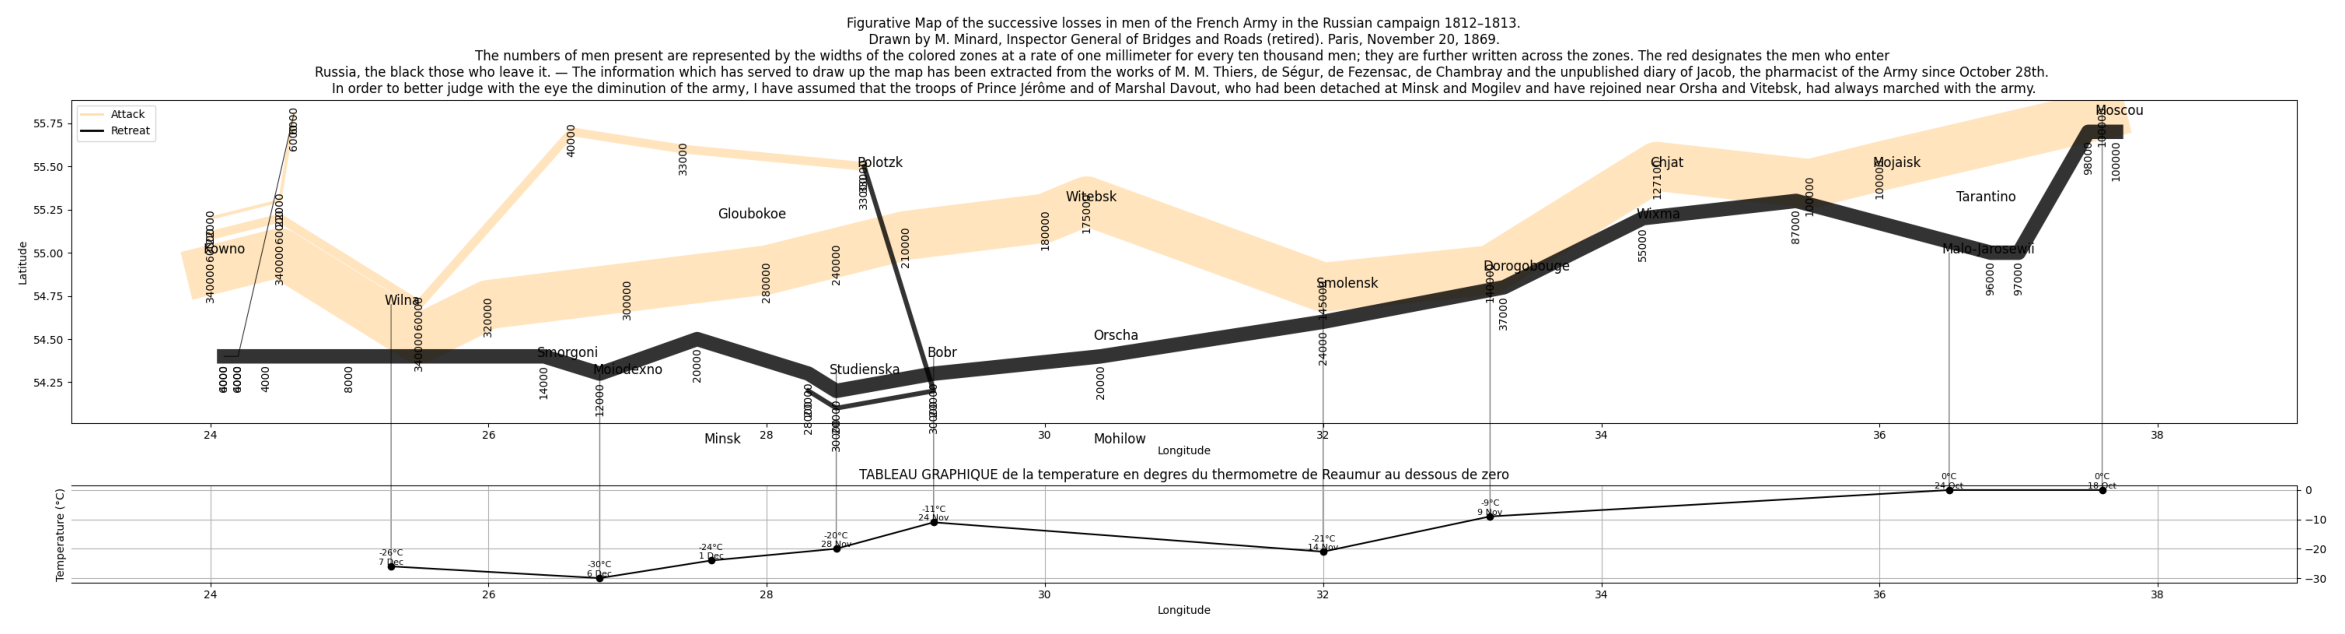

In [98]:
from matplotlib import image as mpimg

# Reload the saved PNG file
img = mpimg.imread("problem3.png")

# Display the reloaded image
fig, ax = plt.subplots(figsize=(30, 8))  # Use the same size as the original figure
plt.imshow(img)
plt.axis('off')  # Turn off the axes
plt.show()

# Reproduce Process

In [85]:
# Load data
troops = pd.read_csv("troops.txt", sep='\s+')
temps = pd.read_csv("temps.txt", sep='\s+')
cities = pd.read_csv("cities.txt", sep='\s+')

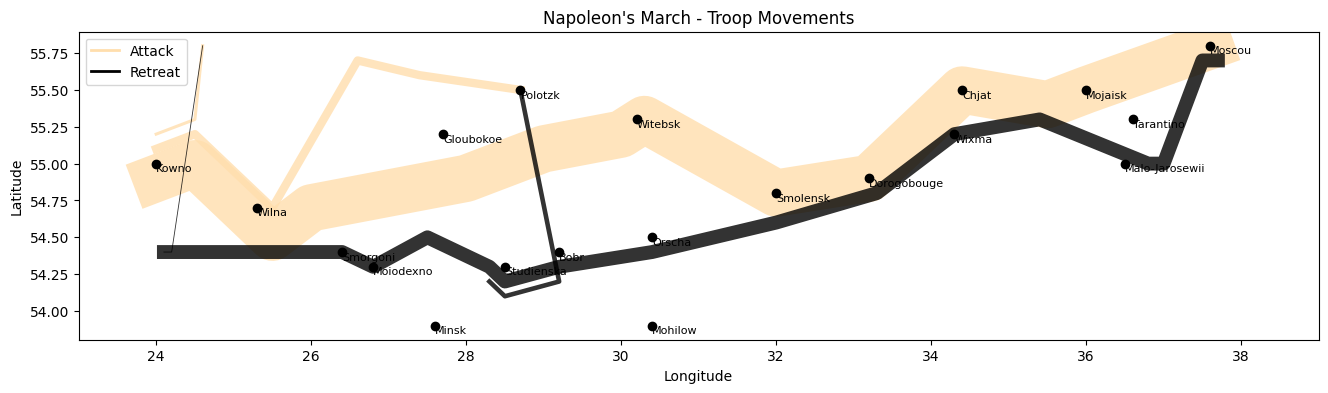

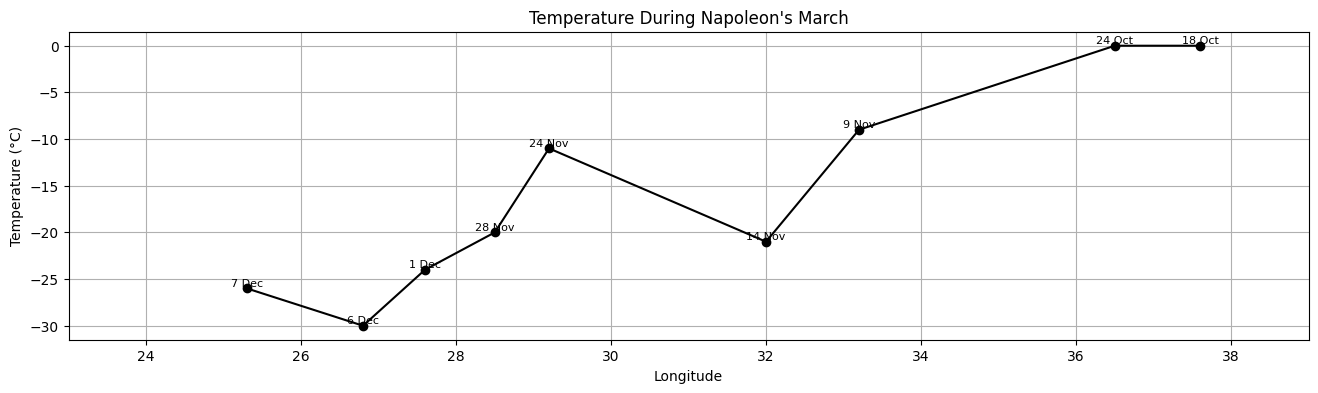

In [86]:
# Convert date format for temperatures
temps['date'] = pd.to_datetime(temps['date'], format='%d%b%Y')

# Set x-axis limits
x_limits = (23, 39)

# --- Part 1: Plot troops' movements with cities ---
fig, ax = plt.subplots(figsize=(16, 4))

# Plot troop movements
for direction, color in zip(['A', 'R'], ['navajowhite', 'black']):
    subset = troops[troops['direction'] == direction]
    for group_id in subset['group'].unique():
        group_data = subset[subset['group'] == group_id]
        ax.plot(
            group_data['long'],
            group_data['lat'],
            color=color,
            linewidth=group_data['survivors'].iloc[0] / 10000,  # Scale line width by survivors
            alpha=0.8,
        )

# Plot cities and annotate them
ax.scatter(cities['long'], cities['lat'], color='black', zorder=3)
for _, row in cities.iterrows():
    ax.text(row['long'], row['lat'], row['city'], fontsize=8, ha='left', va='top')

# Set x and y limits
ax.set_xlim(x_limits)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Napoleon's March - Troop Movements")

# Custom legend for troop directions
legend_elements = [
    Line2D([0], [0], color='navajowhite', lw=2, label='Attack'),
    Line2D([0], [0], color='black', lw=2, label='Retreat')
]
ax.legend(handles=legend_elements, loc='upper left')

# Save the plot
plt.savefig("march.pdf", bbox_inches="tight")

# --- Part 2: Plot temperature over time ---
fig, ax = plt.subplots(figsize=(16, 4))

# Plot temperature data
ax.plot(temps['long'], temps['temp'], color='black', linestyle='-', marker='o', label='Temperature')

# Annotate temperature with day and month
for _, row in temps.iterrows():
    ax.text(row['long'], row['temp'], f"{row['day']} {row['month']}", fontsize=8, ha='center', va='bottom')

# Set x limits
ax.set_xlim(x_limits)
ax.set_xlabel("Longitude")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Temperature During Napoleon's March")
ax.grid(True)

# Save the plot
plt.savefig("temps.pdf", bbox_inches="tight")

plt.show()


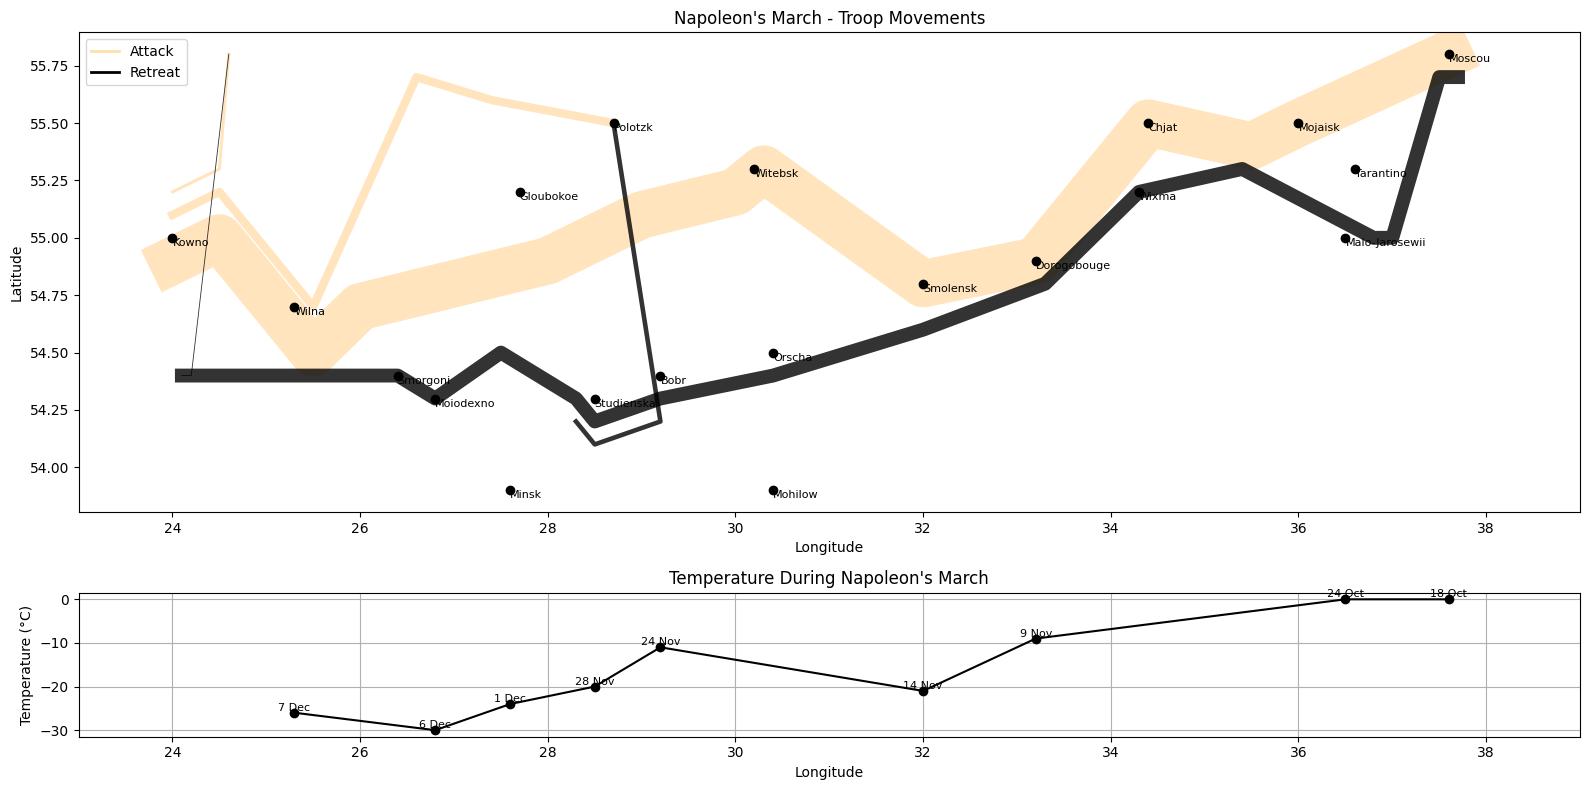

In [87]:
# Convert date format for temperatures
temps['date'] = pd.to_datetime(temps['date'], format='%d%b%Y')

# Set x-axis limits
x_limits = (23, 39)

# Create a figure with 2 rows and 1 column, for the troop movement and temperature plots
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.3])  # Top plot is larger

# --- Part 1: Plot troops' movements with cities ---
ax1 = plt.subplot(gs[0])

# Plot troop movements
for direction, color in zip(['A', 'R'], ['navajowhite', 'black']):
    subset = troops[troops['direction'] == direction]
    for group_id in subset['group'].unique():
        group_data = subset[subset['group'] == group_id]
        ax1.plot(
            group_data['long'],
            group_data['lat'],
            color=color,
            linewidth=group_data['survivors'].iloc[0] / 10000,  # Scale line width by survivors
            alpha=0.8,
        )

# Plot cities and annotate them
ax1.scatter(cities['long'], cities['lat'], color='black', zorder=3)
for _, row in cities.iterrows():
    ax1.text(row['long'], row['lat'], row['city'], fontsize=8, ha='left', va='top')

# Set x and y limits
ax1.set_xlim(x_limits)
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Napoleon's March - Troop Movements")

# Custom legend for troop directions
legend_elements = [
    Line2D([0], [0], color='navajowhite', lw=2, label='Attack'),
    Line2D([0], [0], color='black', lw=2, label='Retreat')
]
ax1.legend(handles=legend_elements, loc='upper left')

# --- Part 2: Plot temperature over time ---
ax2 = plt.subplot(gs[1])

# Plot temperature data
ax2.plot(temps['long'], temps['temp'], color='black', linestyle='-', marker='o', label='Temperature')

# Annotate temperature with day and month
for _, row in temps.iterrows():
    ax2.text(row['long'], row['temp'], f"{row['day']} {row['month']}", fontsize=8, ha='center', va='bottom')

# Set x limits
ax2.set_xlim(x_limits)
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Temperature (°C)")
ax2.set_title("Temperature During Napoleon's March")
ax2.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Optionally save the merged figure
fig.savefig("napoleons_march_combined.pdf", bbox_inches="tight")


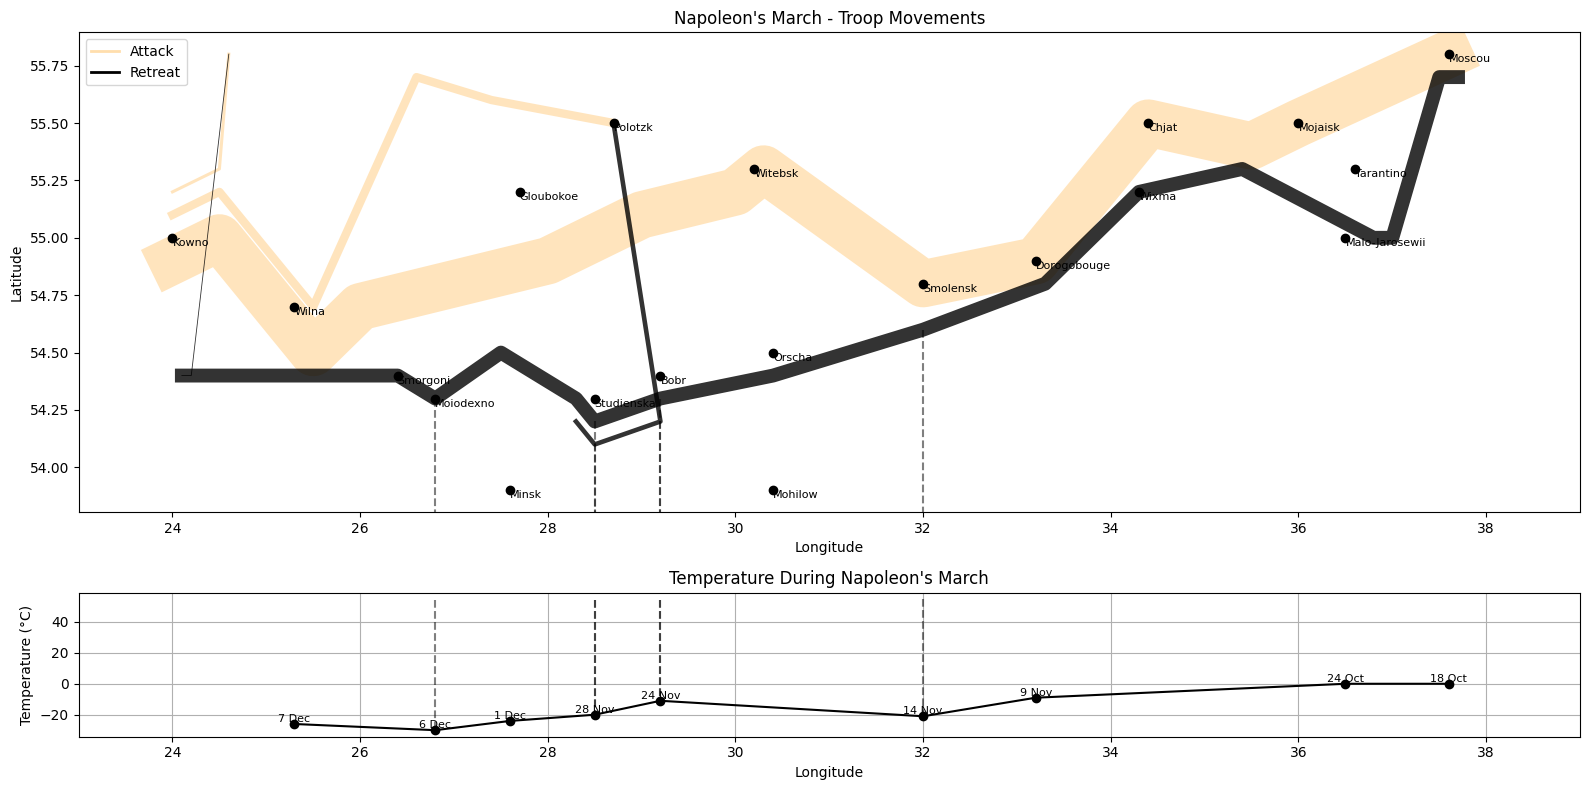

In [88]:
# Convert date format for temperatures
temps['date'] = pd.to_datetime(temps['date'], format='%d%b%Y')

# Set x-axis limits
x_limits = (23, 39)

# Create a figure with 2 rows and 1 column, for the troop movement and temperature plots
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.3])  # Top plot is larger

# --- Part 1: Plot troops' movements with cities --- (Troops plot on top)
ax1 = plt.subplot(gs[0])

# Plot troop movements
for direction, color in zip(['A', 'R'], ['navajowhite', 'black']):
    subset = troops[troops['direction'] == direction]
    for group_id in subset['group'].unique():
        group_data = subset[subset['group'] == group_id]
        ax1.plot(
            group_data['long'],
            group_data['lat'],
            color=color,
            linewidth=group_data['survivors'].iloc[0] / 10000,  # Scale line width by survivors
            alpha=0.8,
        )

# Plot cities and annotate them
ax1.scatter(cities['long'], cities['lat'], color='black', zorder=3)
for _, row in cities.iterrows():
    ax1.text(row['long'], row['lat'], row['city'], fontsize=8, ha='left', va='top')

# Set x and y limits for ax1 (troops movement)
ax1.set_xlim(x_limits)
ax1.set_ylim(ax1.get_ylim())  # Keeps the troop movement y-axis fixed
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Napoleon's March - Troop Movements")

# Custom legend for troop directions
legend_elements = [
    Line2D([0], [0], color='navajowhite', lw=2, label='Attack'),
    Line2D([0], [0], color='black', lw=2, label='Retreat')
]
ax1.legend(handles=legend_elements, loc='upper left')

# --- Part 2: Plot temperature over time --- (Temperature plot on bottom)
ax2 = plt.subplot(gs[1])

# Plot temperature data
ax2.plot(temps['long'], temps['temp'], color='black', linestyle='-', marker='o', label='Temperature')

# Annotate temperature with day and month
for _, row in temps.iterrows():
    ax2.text(row['long'], row['temp'], f"{row['day']} {row['month']}", fontsize=8, ha='center', va='bottom')

# Create a mapping of longitude to temperature for efficient lookup
long_to_temp = temps.set_index('long')['temp'].to_dict()

# Set x limits for ax2 (temperature plot)
ax2.set_xlim(x_limits)
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Temperature (°C)")
ax2.set_title("Temperature During Napoleon's March")
ax2.grid(True)

# Add vertical lines for the route with the longitudes that appear in the temps data
retreat_subset = troops[troops['direction'] == 'R']
for group_id in retreat_subset['group'].unique():
    group_data = retreat_subset[retreat_subset['group'] == group_id]
    
    for long in group_data['long']:
        if long in long_to_temp:  # Check if the longitude exists in the temperature data
            temp_value = long_to_temp[long]
            y_pos_troop = group_data[group_data['long'] == long]['lat'].iloc[0]
            
            # Plot the vertical line on ax1 (troop movement plot) at the correct longitude
            ax1.plot([long, long], [y_pos_troop, temp_value], color='black', linestyle='--', alpha=0.5)  # Vertical line in troop space
            ax2.plot([long, long], [y_pos_troop, temp_value], color='black', linestyle='--', alpha=0.5)


# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Optionally save the merged figure
# fig.savefig("napoleons_march_combined_with_vertical_lines.pdf", bbox_inches="tight")


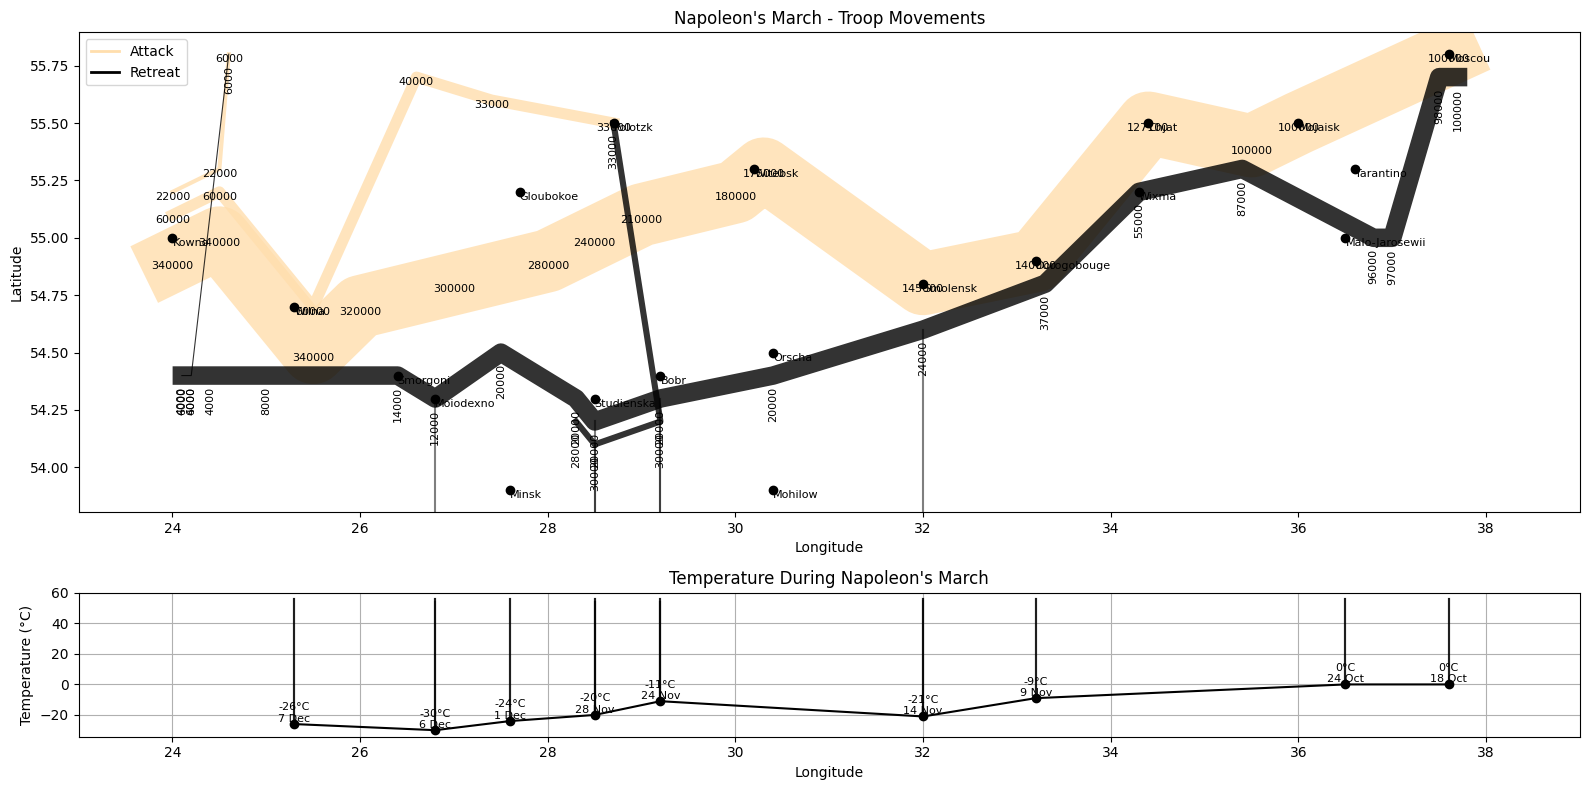

In [89]:
# Convert date format for temperatures
temps['date'] = pd.to_datetime(temps['date'], format='%d%b%Y')

# Set x-axis limits
x_limits = (23, 39)

# Create a figure with 2 rows and 1 column, for the troop movement and temperature plots
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.3])  # Top plot is larger

# --- Part 1: Plot troops' movements with cities --- (Troops plot on top)
ax1 = plt.subplot(gs[0])

# Plot troop movements and add survivor labels
for direction, color in zip(['A', 'R'], ['navajowhite', 'black']):
    subset = troops[troops['direction'] == direction]
    for group_id in subset['group'].unique():
        group_data = subset[subset['group'] == group_id]
        ax1.plot(
            group_data['long'],
            group_data['lat'],
            color=color,
            linewidth=group_data['survivors'].iloc[0] / 7500,  # Scale line width by survivors
            alpha=0.8,
        )

        # Add survivor labels for retreat groups (only for retreat, not attack)
        if direction == 'R':  # Only add survivors for retreat movements
            for _, row in group_data.iterrows():
                ax1.text(
                    row['long'], row['lat'] - 0.05,  # Adjust the y-coordinate slightly below the troop path
                    f"{row['survivors']}",  # Show the number of survivors
                    fontsize=8, ha='center', va='top', color='black', zorder=4,
                    rotation=90  # Rotate text to be vertical
                )
        else:
            for _, row in group_data.iterrows():
                ax1.text(
                row['long'], row['lat'], 
                f"{row['survivors']}",  # Show the number of survivors
                fontsize=8, ha='center', va='top', color='black', zorder=4
                )




# Plot cities and annotate them
ax1.scatter(cities['long'], cities['lat'], color='black', zorder=3)
for _, row in cities.iterrows():
    ax1.text(row['long'], row['lat'], row['city'], fontsize=8, ha='left', va='top')

# Set x and y limits for ax1 (troops movement)
ax1.set_xlim(x_limits)
ax1.set_ylim(ax1.get_ylim())  # Keeps the troop movement y-axis fixed
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Napoleon's March - Troop Movements")

# Custom legend for troop directions
legend_elements = [
    Line2D([0], [0], color='navajowhite', lw=2, label='Attack'),
    Line2D([0], [0], color='black', lw=2, label='Retreat')
]
ax1.legend(handles=legend_elements, loc='upper left')

# --- Part 2: Plot temperature over time --- (Temperature plot on bottom)
ax2 = plt.subplot(gs[1])

# Plot temperature data
ax2.plot(temps['long'], temps['temp'], color='black', linestyle='-', marker='o', label='Temperature')

# Annotate temperature with day, month, and temperature value
for _, row in temps.iterrows():
    ax2.text(
        row['long'], row['temp'], 
        f"{row['temp']}°C\n{row['day']} {row['month']}",  # Show the temperature and date
        fontsize=8, ha='center', va='bottom', color='black', zorder=4
    )

# Create a mapping of longitude to temperature for efficient lookup
long_to_temp = temps.set_index('long')['temp'].to_dict()

# Set x limits for ax2 (temperature plot)
ax2.set_xlim(x_limits)
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Temperature (°C)")
ax2.set_title("Temperature During Napoleon's March")
ax2.grid(True)

# Add vertical lines for the route with the longitudes that appear in the temps data
retreat_subset = troops[troops['direction'] == 'R']
for group_id in retreat_subset['group'].unique():
    group_data = retreat_subset[retreat_subset['group'] == group_id]
    
    for long in group_data['long']:
        temp_value = long_to_temp.get(long, np.nan)  # Get temperature or NaN if not found
        y_pos_troop = group_data[group_data['long'] == long]['lat'].iloc[0]
        
        # Plot the vertical line on ax1 (troop movement plot) at the correct longitude
        ax1.plot([long, long], [y_pos_troop, temp_value], color='black', linestyle='-', alpha=0.5)  # Vertical line in troop space
        ax2.plot([long, long], [y_pos_troop, temp_value], color='black', linestyle='-', alpha=0.5)

    for long in long_to_temp.keys():
        temp_value = long_to_temp.get(long, np.nan) 
        y_pos_troop = retreat_subset['lat'].iloc[0]  # Position of the troop at this longitude
        
        # Plot the vertical line on ax1 (troop movement plot) at the correct longitude
        ax2.plot([long, long], [y_pos_troop, temp_value], color='black', linestyle='-', alpha=0.5)
    


# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Optionally save the merged figure
# fig.savefig("napoleons_march_combined_with_vertical_lines.pdf", bbox_inches="tight")


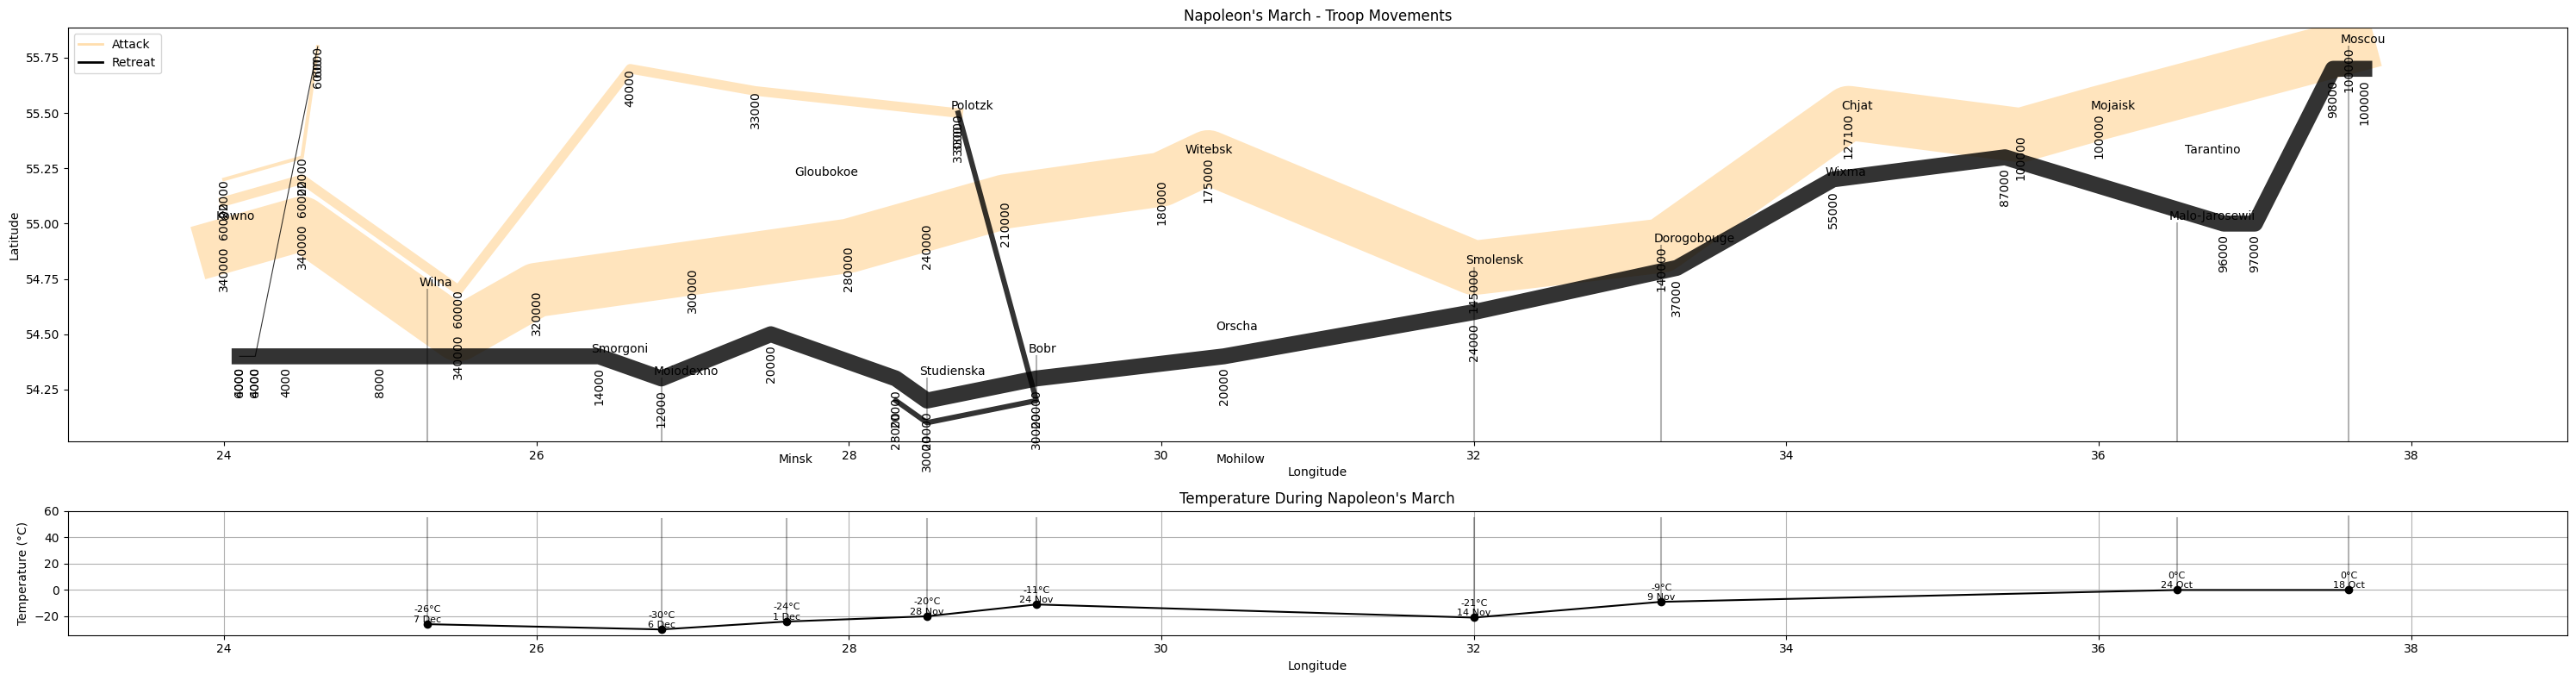

In [90]:
# Convert date format for temperatures
temps['date'] = pd.to_datetime(temps['date'], format='%d%b%Y')

# Set x-axis limits
x_limits = (23, 39)

# Create a figure with 2 rows and 1 column, for the troop movement and temperature plots
fig = plt.figure(figsize=(30, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.3])  # Top plot is larger

# --- Part 1: Plot troops' movements with cities --- (Troops plot on top)
ax1 = plt.subplot(gs[0])

# Plot troop movements and add survivor labels
for direction, color in zip(['A', 'R'], ['navajowhite', 'black']):
    subset = troops[troops['direction'] == direction]
    for group_id in subset['group'].unique():
        group_data = subset[subset['group'] == group_id]
        ax1.plot(
            group_data['long'],
            group_data['lat'],
            color=color,
            linewidth=group_data['survivors'].iloc[0] / 7500,  # Scale line width by survivors
            alpha=0.8,
        )

        # Add survivor labels for retreat groups (only for retreat, not attack)
        if direction == 'R':  # Only add survivors for retreat movements
            for _, row in group_data.iterrows():
                ax1.text(
                    row['long'], row['lat'] - 0.05,  # Adjust the y-coordinate slightly below the troop path
                    f"{row['survivors']}",  # Show the number of survivors
                    fontsize=10, ha='center', va='top', color='black', zorder=4,
                    rotation=90  # Rotate text to be vertical
                )
        else:
            for _, row in group_data.iterrows():
                ax1.text(
                row['long'], row['lat'], 
                f"{row['survivors']}",  # Show the number of survivors
                fontsize=10, ha='center', va='top', color='black', zorder=4,
                rotation=90
                )


# Plot cities and annotate them
for _, row in cities.iterrows():
    ax1.text(row['long']-0.05, row['lat']+0.06, row['city'], fontsize=10, ha='left', va='top')

# Set x and y limits for ax1 (troops movement)
ax1.set_xlim(x_limits)
ax1.set_ylim(ax1.get_ylim())  # Keeps the troop movement y-axis fixed
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Napoleon's March - Troop Movements")

# Custom legend for troop directions
legend_elements = [
    Line2D([0], [0], color='navajowhite', lw=2, label='Attack'),
    Line2D([0], [0], color='black', lw=2, label='Retreat')
]
ax1.legend(handles=legend_elements, loc='upper left')

# --- Part 2: Plot temperature over time --- (Temperature plot on bottom)
ax2 = plt.subplot(gs[1])

# Plot temperature data
ax2.plot(temps['long'], temps['temp'], color='black', linestyle='-', marker='o', label='Temperature')

# Annotate temperature with day, month, and temperature value
for _, row in temps.iterrows():
    ax2.text(
        row['long'], row['temp'], 
        f"{row['temp']}°C\n{row['day']} {row['month']}",  # Show the temperature and date
        fontsize=8, ha='center', va='bottom', color='black', zorder=4
    )

# Create a mapping of longitude to temperature for efficient lookup
long_to_temp = temps.set_index('long')['temp'].to_dict()

# Set x limits for ax2 (temperature plot)
ax2.set_xlim(x_limits)
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Temperature (°C)")
ax2.set_title("Temperature During Napoleon's March")
ax2.grid(True)

# Add vertical lines for cities and match them with temperature data
for _, city_row in cities.iterrows():
    long = city_row['long']
    temp_value = long_to_temp.get(long, np.nan)  # Get temperature for city or NaN if not found

    # Plot the vertical line on ax1 (troop movement plot) at the correct longitude
    ax1.plot([long, long], [city_row['lat'], temp_value], color='black', linestyle='-', alpha=0.3)  # Vertical line in troop space
    ax2.plot([long, long], [city_row['lat'], temp_value], color='black', linestyle='-', alpha=0.3)  # Vertical line in temperature plot

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Optionally save the merged figure
fig.savefig("napoleons_march_combined_with_vertical_lines.pdf", bbox_inches="tight")


# Final Plot

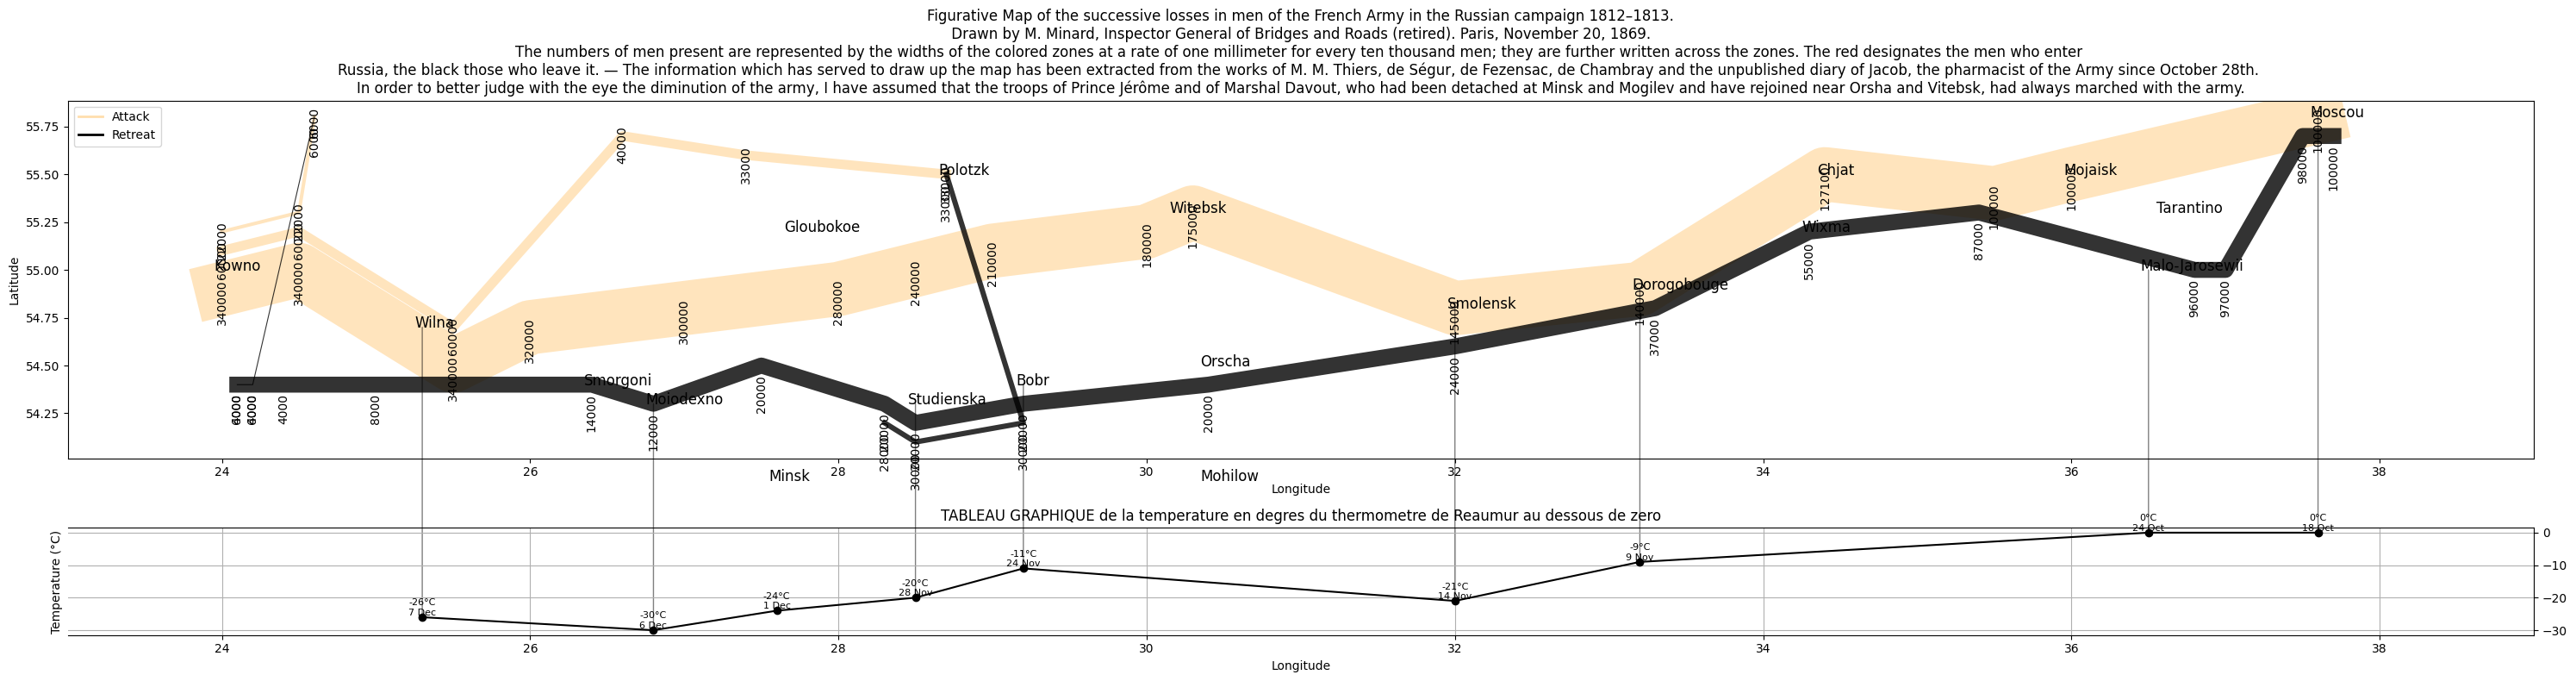

In [93]:
# Convert date format for temperatures
temps['date'] = pd.to_datetime(temps['date'], format='%d%b%Y')

# Set x-axis limits
x_limits = (23, 39)

# Create a figure with 2 rows and 1 column, for the troop movement and temperature plots
fig = plt.figure(figsize=(30, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.3])  # Top plot is larger

# --- Part 1: Plot troops' movements with cities --- (Troops plot on top)
ax1 = plt.subplot(gs[0])

# Plot troop movements and add survivor labels
for direction, color in zip(['A', 'R'], ['navajowhite', 'black']):
    subset = troops[troops['direction'] == direction]
    for group_id in subset['group'].unique():
        group_data = subset[subset['group'] == group_id]
        ax1.plot(
            group_data['long'],
            group_data['lat'],
            color=color,
            linewidth=group_data['survivors'].iloc[0] / 7500,  # Scale line width by survivors
            alpha=0.8,
        )

        # Add survivor labels for retreat groups (only for retreat, not attack)
        if direction == 'R':  # Only add survivors for retreat movements
            for _, row in group_data.iterrows():
                ax1.text(
                    row['long'], row['lat'] - 0.05,  # Adjust the y-coordinate slightly below the troop path
                    f"{row['survivors']}",  # Show the number of survivors
                    fontsize=10, ha='center', va='top', color='black', zorder=4,
                    rotation=90  # Rotate text to be vertical
                )
        else:
            for _, row in group_data.iterrows():
                ax1.text(
                row['long'], row['lat'] + 0.05, 
                f"{row['survivors']}",  # Show the number of survivors
                fontsize=10, ha='center', va='top', color='black', zorder=4,
                rotation=90
                )


# Plot cities and annotate them
for _, row in cities.iterrows():
    ax1.text(row['long']-0.05, row['lat']+0.06, row['city'], fontsize=12, ha='left', va='top')

# Set x and y limits for ax1 (troops movement)
ax1.set_xlim(x_limits)
ax1.set_ylim(ax1.get_ylim())  # Keeps the troop movement y-axis fixed
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
title = "Figurative Map of the successive losses in men of the French Army in the Russian campaign 1812–1813.\n Drawn by M. Minard, Inspector General of Bridges and Roads (retired). Paris, November 20, 1869. \n" + \
"The numbers of men present are represented by the widths of the colored zones at a rate of one millimeter for every ten thousand men; they are further written across the zones. The red designates the men who enter \n" + \
    "Russia, the black those who leave it. — The information which has served to draw up the map has been extracted from the works of M. M. Thiers, de Ségur, de Fezensac, de Chambray and the unpublished diary of Jacob, the pharmacist of the Army since October 28th. \n" +\
    "In order to better judge with the eye the diminution of the army, I have assumed that the troops of Prince Jérôme and of Marshal Davout, who had been detached at Minsk and Mogilev and have rejoined near Orsha and Vitebsk, had always marched with the army."
ax1.set_title(title)

# Custom legend for troop directions
legend_elements = [
    Line2D([0], [0], color='navajowhite', lw=2, label='Attack'),
    Line2D([0], [0], color='black', lw=2, label='Retreat')
]
ax1.legend(handles=legend_elements, loc='upper left')

# --- Part 2: Plot temperature over time --- (Temperature plot on bottom)
ax2 = plt.subplot(gs[1])

# Plot temperature data
ax2.plot(temps['long'], temps['temp'], color='black', linestyle='-', marker='o', label='Temperature')

# Annotate temperature with day, month, and temperature value
for _, row in temps.iterrows():
    ax2.text(
        row['long'], row['temp'], 
        f"{row['temp']}°C\n{row['day']} {row['month']}",  # Show the temperature and date
        fontsize=8, ha='center', va='bottom', color='black', zorder=4
    )

# Create a mapping of longitude to temperature for efficient lookup
long_to_temp = temps.set_index('long')['temp'].to_dict()

# Set x limits for ax2 (temperature plot)
ax2.set_xlim(x_limits)
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Temperature (°C)")
ax2.set_title("TABLEAU GRAPHIQUE de la temperature en degres du thermometre de Reaumur au dessous de zero")
ax2.grid(True)
ax2.yaxis.tick_right()
ax2.spines["left"].set_visible(False)  # Hide the left spine
ax2.spines["right"].set_visible(True)  # Show the right spine

# Add vertical lines for cities and match them with temperature data
for _, city_row in cities.iterrows():
    long = city_row['long']
    lat = city_row['lat']
    temp_value = long_to_temp.get(long, np.nan)  # Get temperature for city or NaN if not found
    
    # Coordinates for the city in troop movement space (ax1) and temperature space (ax2)
    coord_city = (long, lat)  # City location on ax1
    coord_temp = (long, temp_value)  # Temperature point on ax2


    # Create a ConnectionPatch between the two plots
    con = ConnectionPatch(
        xyA=coord_city,  # Point in troop movement plot (ax1)
        xyB=coord_temp,  # Point in temperature plot (ax2)
        coordsA="data",  # Coordinate type for ax1
        coordsB="data",  # Coordinate type for ax2
        axesA=ax1,       # Connect from ax1
        axesB=ax2,       # Connect to ax2
        color="black",   # Line color
        linestyle="-",   # Line style
        alpha=0.5        # Line transparency
    )
    
    # Add the ConnectionPatch to the figure
    ax2.add_artist(con)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Optionally save the merged figure as a PNG file
fig.savefig("napoleons_march_combined_with_vertical_lines.png", bbox_inches="tight", dpi=300)



In [92]:
plt.clf()  # Clears the current figure
plt.close(fig)  # Closes the figure and releases memory
plt.close()